In [1]:
import datacube
from deafrica_tools.plotting import rgb, display_map
import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog
from datacube.utils.geometry import CRS

from deafrica_tools.plotting import display_map, rgb
import xarray as xr
import numpy as np
dc = datacube.Datacube(app="04_Plotting")
# 15.85828652, 80.78694696
# 15.75418332, 81.02203692
# (22.23215830655522, 22.340168465227162) 
lat_range = (21.822747643151935, 22.59575464855534)
lon_range = (68.88427734375001, 69.90600585937501)
# lat_range = (15.75418332, 15.85828652)
# lon_range = (80.78694696, 81.02203692)
# la = 21.40
# lo = 69.90
# buf = 0.15
# lat_range = (la-buf, la+buf)
# lon_range = (lo-buf, lo+buf)
time_range = ('2023-02-09', '2023-02-15')
ds1 = dc.load(product="s2a_sen2cor_granule",
                 measurements=["red","green","blue", "nir"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs=CRS('EPSG:6933'),
             resolution=(-30, 30))
dataset =  odc.algo.to_f32(ds1)
print(ds1)
print(dataset)
# print(landsat_dataset)
# print(sentinel_dataset)
# lat_range = (21.611674, 22.607037)
# lon_range = (68.999805, 70.068079)
# display_map(x=lon_range, y=lat_range)
ds2 = dc.load(product="random_product",
                 measurements=["rainfall"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs=CRS('EPSG:6933'),
             resolution=(-30, 30))
print(ds2)
# combined_dataset = landsat_dataset.merge(ds, compat = "override")
merged_ds = xr.merge([dataset, ds2])
# valid_data = combined_dataset['rainfall'].values[~np.isnan(combined_dataset['rainfall'].values)]
print(merged_ds)
print(merged_ds['rainfall'].values[merged_ds['rainfall'].values == 0.2])
# Print the valid values
# print(valid_data[0])
# print(combined_dataset['rainfall'].values)

<xarray.Dataset>
Dimensions:      (time: 1, y: 3050, x: 3287)
Coordinates:
  * time         (time) datetime64[ns] 2023-02-14T06:03:00.763574
  * y            (y) float64 2.81e+06 2.81e+06 2.81e+06 ... 2.719e+06 2.719e+06
  * x            (x) float64 6.646e+06 6.646e+06 ... 6.745e+06 6.745e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 0 0 0 0 0 0 ... 2653 2015 2152 1361 1168
    green        (time, y, x) uint16 0 0 0 0 0 0 ... 2132 1629 1732 1632 1596
    blue         (time, y, x) uint16 0 0 0 0 0 0 ... 1750 1357 1428 1159 1090
    nir          (time, y, x) uint16 0 0 0 0 0 0 ... 3449 2732 2880 6117 6178
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref
<xarray.Dataset>
Dimensions:      (time: 1, y: 3050, x: 3287)
Coordinates:
  * time         (time) datetime64[ns] 2023-02-14T06:03:00.763574
  * y            (y) float64 2.81e+06 2.81e+06 2.81e+06 ... 2.719e+06 2.719e+06
  * x            (x) float64 6.646e+06 6.646e+06 ... 6.74

/home/adithya/anaconda3/envs/odc_env/lib/python3.8/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


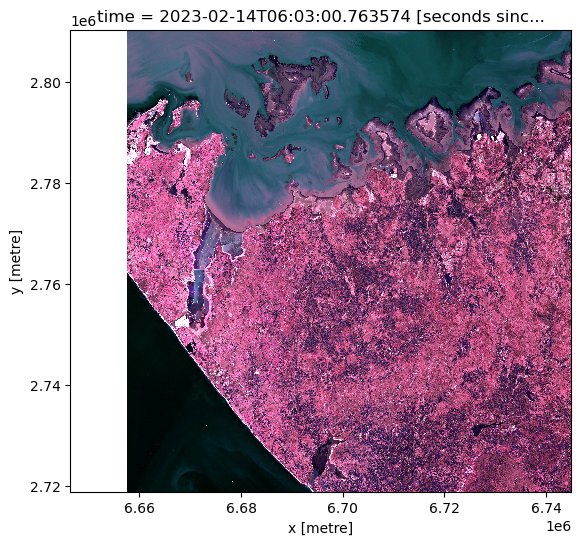

In [2]:
# Load the data from the Datacube
dataset = merged_ds
# scl = ds['SCL_20m']
# clear_pixels = (scl != 3) & (scl != 8) & (scl != 9)
# print(clear_pixels)
# ndvi_masked = ndvi.where(clear_pixels)
# print(ndvi_masked)
rgb(dataset, bands=['red', 'blue', 'green'], index=[0])

In [3]:
import numpy as np

In [4]:
# # convert dataset to float32 datatype so no-data values are set to NaN
# dataset =  odc.algo.to_f32(dataset)

# # Calculate the components that make up the NDVI calculation
# band_diff = dataset.B08_10m - dataset.B04_10m
# band_sum = dataset.B08_10m + dataset.B04_10m

# # Calculate NDVI and store it as a measurement in the original dataset
# ndvi = band_diff / band_sum

# # print(list(map(lambda x: x.split('T')[0], [i for i in np.datetime_as_string(ndvi.time.values).tolist()])))
# # mean_per_time = ndvi.mean(dim='time')
# # selected_times = ndvi.isel(time=[0, 1])  # Select the first two time steps

# masked_ds_mean = ndvi.mean(dim=['x', 'y'], skipna=True)
# # mean_ndvi = selected_times.mean(dim='time')  # Calculate the mean along the 'time' dimension

# # Print the resulting mean_ndvi
# print(masked_ds_mean.values.tolist())
# # print(ndvi)

In [5]:
# # dataset =  odc.algo.to_f32(merged_ds)
# # print(dataset)
# plt.figure(figsize=(8, 8))
# dataset.plot.scatter()
# plt.show()

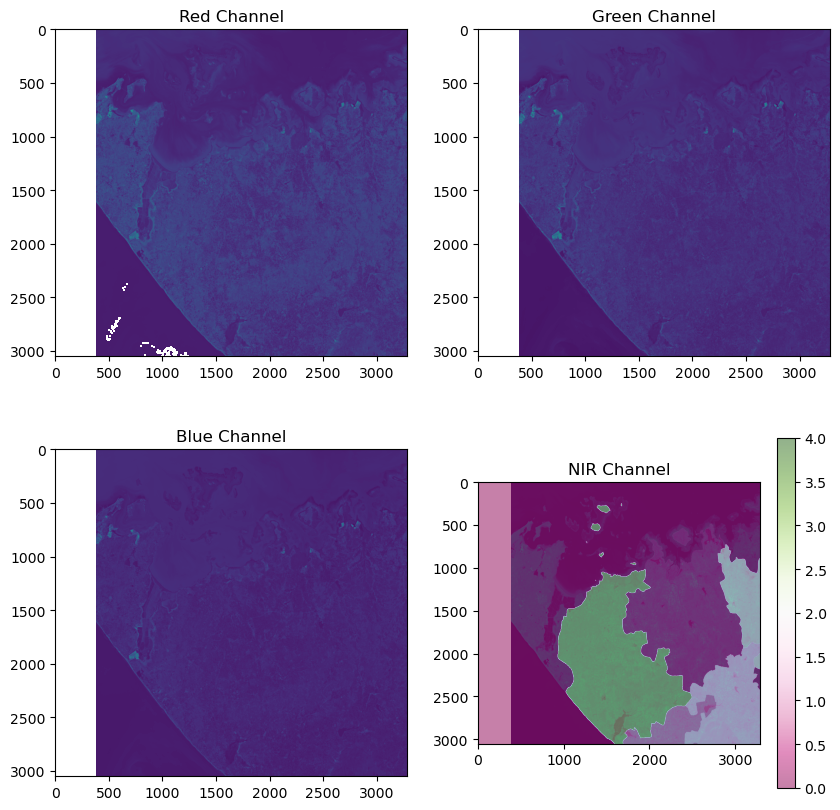

In [6]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the dataset
dataset = merged_ds

# Access the variables
red = dataset['red']
green = dataset['green']
blue = dataset['blue']
nir = dataset['nir']
rainfall = dataset['rainfall']

# Create a figure and axes for the subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the red channel
axs[0, 0].imshow(red[0, :, :])
axs[0, 0].set_title('Red Channel')

# Plot the green channel
axs[0, 1].imshow(green[0, :, :])
axs[0, 1].set_title('Green Channel')

# Plot the blue channel
axs[1, 0].imshow(blue[0, :, :])
axs[1, 0].set_title('Blue Channel')

# Plot the NIR channel
axs[1, 1].imshow(nir[0, :, :])
axs[1, 1].set_title('NIR Channel')

# Overlay the rainfall plot on top of the red channel plot
rainfall_plot = axs[1, 1].imshow(rainfall[0, :, :], cmap='PiYG', vmin = 0, vmax = 4,alpha=0.5)
plt.colorbar(rainfall_plot, ax=axs[1, 1])

# Show the plots
plt.show()